<a href="https://colab.research.google.com/github/florentPoux/3D-Deep-Learning/blob/main/001_Artificial_Neural_Network_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

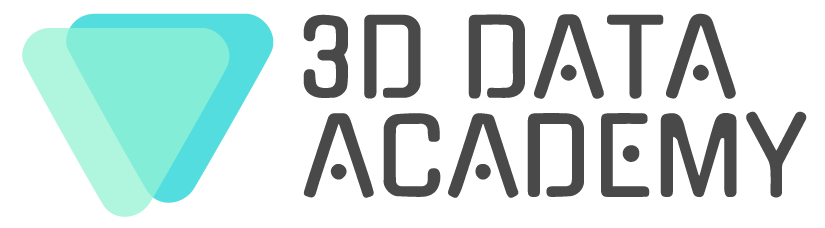

Code Created by 🦊 [Florent Poux](https://medium.com/@florentpoux/) and 🤠 [Jean-Jacques Ponciano](https://learngeodata.eu/).

Licence MIT, worked supported by the [3D Data Academy](https://learngeodata.eu/). Please refer to the [MEDIUM ARTICLE](https://medium.com/@florentpoux) for the full comprehension.

Members of the [3D Data Academy](https://learngeodata.eu/) can use the code with privileged IP Rights.

*   Have fun with this notebook that you can very simply run (ctrl+Enter) !
*   Make sure to modify the paths to your dataset, either locally stored, or in your Drive.

Enjoy! 😉

In [ ]:
#Importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
#We load the data into training and testing sets
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

#We Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 6s 0us/step


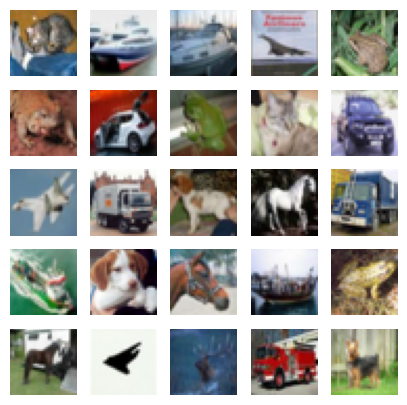

In [ ]:
#We plot the first 25 images
plt.figure(figsize=(5, 5))
for i in range(0, 25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis("off")
plt.show()

In [ ]:
#Definition of our model
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
        ])

In [ ]:
# Passing the optimizer, loss and metrics used
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Defining a early stopping criterion
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="loss", patience=5)

In [ ]:
model.fit(x_train, y_train, epochs=50, callbacks =[earlystopping])

Epoch 1/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4781 - accuracy: 0.4706
Epoch 2/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4648 - accuracy: 0.4785
Epoch 3/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4472 - accuracy: 0.4827
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4420 - accuracy: 0.4879
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4233 - accuracy: 0.4890
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4177 - accuracy: 0.4938
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4000 - accuracy: 0.5012
Epoch 8/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3920 - accuracy: 0.5016
Epoch 9/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3835 - accuracy: 0.5058
Epoch 10/50
1563/1563 [==============================] - 21s 14m

In [ ]:
#Embedding our model with probabilities
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
# prediction on the test dataset
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
# show metrics
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

313/313 [==============================] - 1s 4ms/step - loss: 1.5518 - accuracy: 0.4824
[1.5517816543579102, 0.48240000009536743]


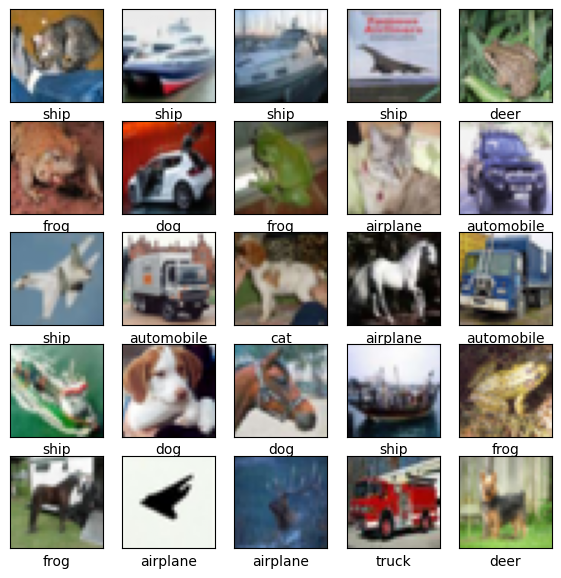

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    prediction = np.argmax(predictions[i])
    plt.xlabel(classes[int(prediction)])
plt.show()